In [1]:
!pip install scikit-learn

In [3]:
import pandas as pd
dataset = pd.read_csv("preprocessed_credit_risk.csv")
dataset.head()

,Unnamed: 0,clientid,income,age,loan,default
0,0,1,66155,59,8106,0
1,1,2,34415,48,6564,0
2,2,3,57317,63,8020,0
3,3,4,42709,45,6103,0
4,4,5,66952,18,8770,1


In [4]:
dataset=dataset.drop(columns = ['Unnamed: 0'],axis = 1)
dataset=dataset.drop(columns = ['clientid'],axis = 1)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Метод k-ближайших соседей (K-Nearest Neighbors)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[499  10]
 [ 10  80]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       509
           1       0.89      0.89      0.89        90

    accuracy                           0.97       599
   macro avg       0.93      0.93      0.93       599
weighted avg       0.97      0.97      0.97       599



Классификатор дерева решений (Decision Tree Classifier)

In [10]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [11]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[332   3]
 [  4  60]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       335
           1       0.95      0.94      0.94        64

    accuracy                           0.98       399
   macro avg       0.97      0.96      0.97       399
weighted avg       0.98      0.98      0.98       399



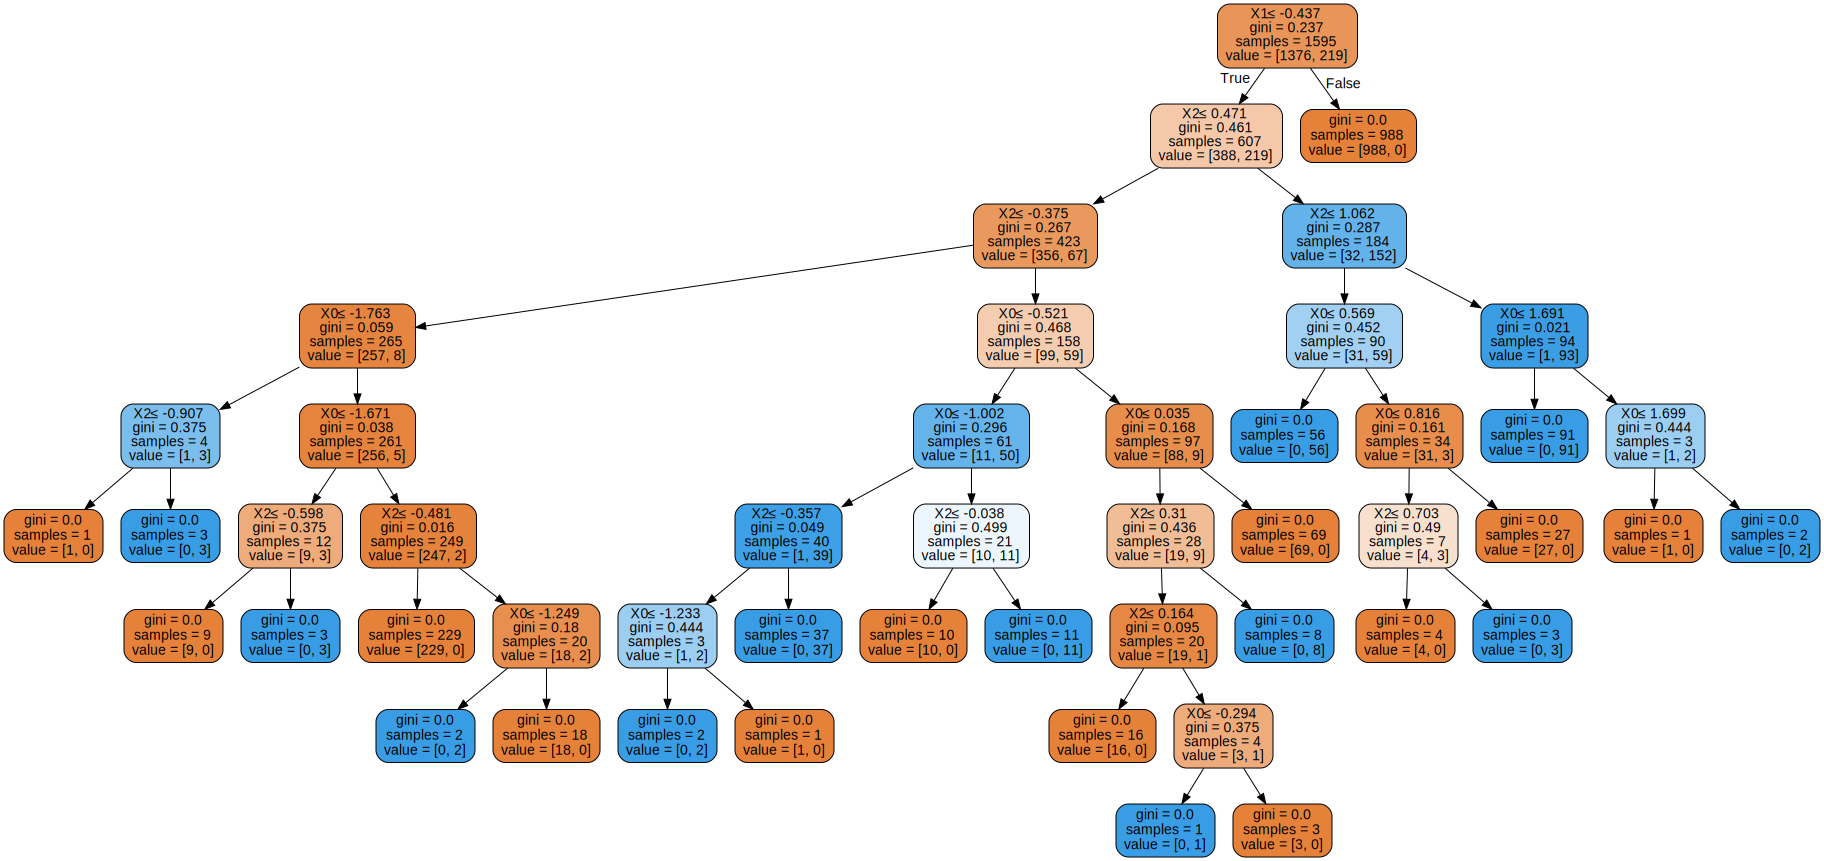

In [12]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("risk")
graph = graphviz.Source(dot_data)  
graph 

Наивный байесовский классификатор (Naive Bayes)

In [24]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[499  10]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       509
           1       0.85      0.61      0.71        90

    accuracy                           0.92       599
   macro avg       0.89      0.80      0.83       599
weighted avg       0.92      0.92      0.92       599



Метод опорных векторов (Support Vector Machines)

In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [29]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[505   4]
 [  8  82]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.95      0.91      0.93        90

    accuracy                           0.98       599
   macro avg       0.97      0.95      0.96       599
weighted avg       0.98      0.98      0.98       599



Логистическая регрессия (Logistic Regression)

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[497  12]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       509
           1       0.85      0.77      0.81        90

    accuracy                           0.94       599
   macro avg       0.91      0.87      0.89       599
weighted avg       0.94      0.94      0.94       599



In [33]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()